In [260]:
import requests as rq
import bs4 as bs

import matplotlib.pyplot as plt
import matplotlib.style as mstyle
%matplotlib inline

import seaborn as sns
sns.set()

mstyle.use('ggplot')
sns.set_style('whitegrid')

In [261]:
from toolz.functoolz import excepts

In [262]:
from matplotlib import rcParams

rcParams['figure.figsize']  = 10, 8
rcParams['font.size']       = 16
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 13
rcParams['ytick.labelsize'] = 13
rcParams['legend.fontsize'] = 15

In [12]:
root = 'https://www.atositchallenge.net/students-ideas/'

soup = bs.BeautifulSoup(rq.get(root).text, 'html5lib')

data = soup.select('div.ideas-wrapper a')
len(data)

In [16]:
mk_safe = lambda f: excepts(Exception, f, lambda _: np.NaN)

def extract_short_info(r):
    
    get_href =  mk_safe(lambda x: x['href'])
    get_title = mk_safe(lambda x: x.select_one('div.caption-container h3').text)
    get_uni =   mk_safe(lambda x: x.select_one('div.caption-container p.university').text)
    get_flag =  mk_safe(lambda x: x.select_one('img.flag')['alt'])
    
    return {
        'url': get_href(r),
        'title': get_title(r),
        'university': get_uni(r),
        'country': get_flag(r)
    }

In [18]:
df = pd.DataFrame([extract_short_info(x) for x in data])
df.country = df.country.str.split(' ').apply(lambda x: x[-1])
df.country = df.country.map({'Turkey': 'Турция', 'China': 'Китай', 'Singapore': 'Сингапур', 'India': 'Индия', 'Kong': 'Гонконг', 
                'France': 'Франция', 'States': 'США', 'Taiwan': 'Тайвань', 'Kingdom': 'Великобритания', 
                'Senegal': 'Сенегал', 'Philippines': 'Филипины', 'Malaysia': 'Малайзия', 'Canada': 'Канада', 
                'Brazil': 'Бразилия', 'Russia': 'Россия', 'Romania': 'Румыния', 'Belgium': 'Бельгия', 'Japan': 'Япония', 
                'Germany': 'Германия', 'Cameroon': 'Камерун', 'Poland': 'Польша','Netherlands': 'Недерланды',
                'Spain': 'Испания','Egypt': 'Египет', 'Mexico': 'Мексика','Morocco': 'Морокко','Austria': 'Австрия'})

In [19]:
df.head()

,country,title,university,url
0,Turkey,studentjob,Duzce University,https://www.atositchallenge.net/idea/studentjob/
1,China,Virtual screening of prodrugs,Nanjing University Of Posts And Telecommunicat...,https://www.atositchallenge.net/idea/virtual-s...
2,Singapore,AudIO,National University of Singapore,https://www.atositchallenge.net/idea/audio/
3,Singapore,HR FriendBot,National University of Singapore,https://www.atositchallenge.net/idea/hr-friend...
4,India,Smart Travel Alarm-An iOS app,anna university chennai,https://www.atositchallenge.net/idea/smart-tra...


In [24]:
# df.to_csv('ideas.csv', index=False)

In [263]:
df = pd.read_csv('ideas.csv')

In [265]:
df.loc[df.country == 'Недерланды', 'country'] = 'Нидерланды'
# df.country = df.country.map({'Недерланды': 'Нидерланды'})

In [21]:
# df.head()

---

In [264]:
def download_description(title, url):
    try:
        soup = bs.BeautifulSoup(rq.get(url).text, 'html5lib')
        
        get_summary = mk_safe(lambda x: x.select_one('p.summary').text)
        get_members = mk_safe(lambda x: x.select('p.members')[0].text)
        
        summary = get_summary(soup)
        members = get_members(soup)
    except:
        return None
    return {
        'title': title,
        'summary': summary,
        'members': members
    }

In [27]:
results = list(df.apply(lambda row: download_description(row['title'], row['url']), axis=1))

df_summaries = pd.DataFrame(list(results))

In [242]:
# df_summaries.head()

In [31]:
df = df.merge(df_summaries)

In [32]:
df.shape

(204, 6)

In [92]:
df.to_csv('ideas.csv', index=False)

---

In [251]:
df.drop('number_of_members', axis=1).head()

,country,title,university,url,members,summary
0,Турция,studentjob,Duzce University,https://www.atositchallenge.net/idea/studentjob/,Oguzhan Cevik | Emre Orucoglu | Mustafa Guzel,It is a platform for university students to fi...
1,Китай,Virtual screening of prodrugs,Nanjing University Of Posts And Telecommunicat...,https://www.atositchallenge.net/idea/virtual-s...,Wenyong Zhu | Guwei Sun | Jingzhou Yuan,With the rapid development of life sciences at...
2,Сингапур,AudIO,National University of Singapore,https://www.atositchallenge.net/idea/audio/,Kai Hsien Boo | Yip Keng Kan,People from a non-English speaking country suc...
3,Сингапур,HR FriendBot,National University of Singapore,https://www.atositchallenge.net/idea/hr-friend...,Say Xian Xun | Yeo York Hao,Allows effective triage and suitability of per...
4,Индия,Smart Travel Alarm-An iOS app,anna university chennai,https://www.atositchallenge.net/idea/smart-tra...,harini dhanasekar | srisai tejaswi | Sowmiya J...,In this modern world Smartphones and Tablets a...


In [268]:
counts = df.country.value_counts()

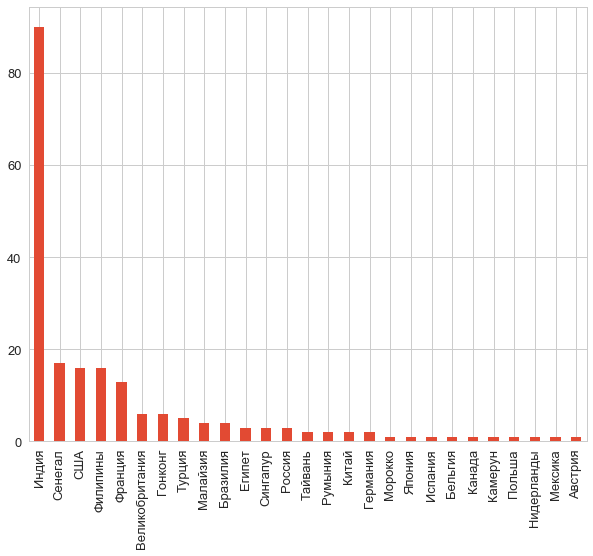

In [269]:
counts.plot.bar();

In [97]:
india_part = pd.Series(data=[counts[0], counts[1:].sum()], index=['Индия', 'Все остальные страны'])

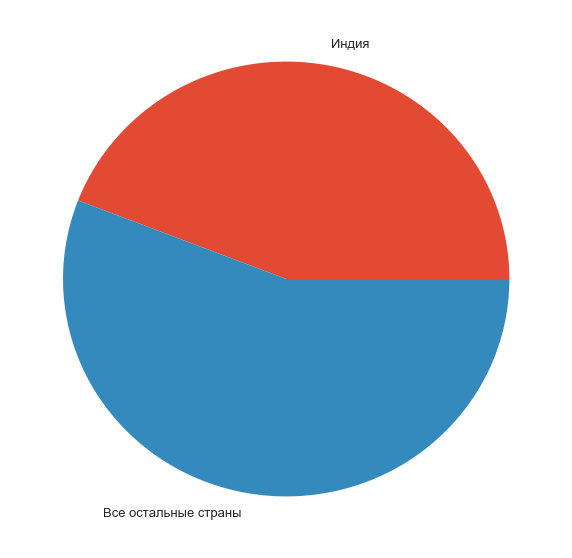

In [98]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
india_part.plot.pie(ax=ax);
ax.set_ylabel('');

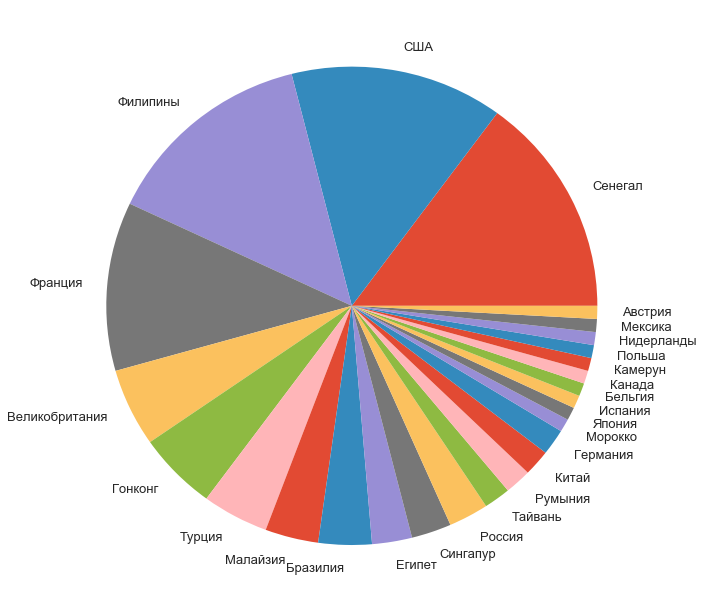

In [270]:
f, ax = plt.subplots(1, 1, figsize=(11, 11))
counts[1:].plot.pie(ax=ax);
ax.set_ylabel('');

In [271]:
university_counts = df.groupby('country')[['university']]\
    .agg('nunique')\
    .sort_values(by='university', ascending=False)

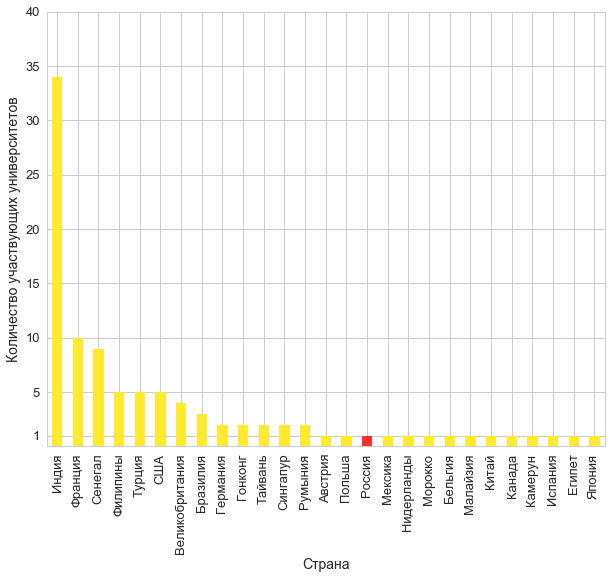

In [272]:
university_counts\
    .plot.bar(colors=['#ffea2d' if k != 'Россия' else '#ff2d2d' \
                      for k in university_counts.index]);
plt.gca().legend_.remove()
plt.ylabel('Количество участвующих университетов');
plt.xlabel('Страна');
y_ticks = list(plt.yticks()[0])
y_ticks.remove(0)
plt.yticks(y_ticks + [1]);

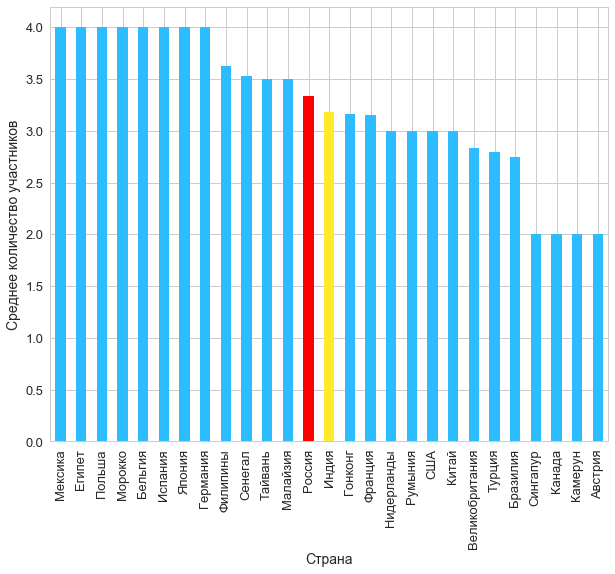

In [273]:
df['number_of_members'] = df.members.str.split('|').apply(lambda x: len(x))
avg_members = df.groupby('country').agg('mean').sort_values(by='number_of_members', ascending=False)

avg_members.plot.bar(colors=['r' if x=='Россия' else ('#2dbcff' if x != 'Индия' else '#ffea2d') for x in avg_members.index]);
plt.gca().legend_.remove()
plt.xlabel('Страна');
plt.ylabel('Среднее количество участников');

# Текст

## Тайтлы

In [121]:
import re

from nltk import word_tokenize

from nltk.corpus import stopwords
from nltk import FreqDist

In [124]:
titles = ' '.join(df.title.values)
tokens = [x.lower() for x in word_tokenize(titles) if re.match("[a-zA-Z\d]+", x) is not None]
tokens = [x for x in tokens if x not in stopwords.words('english')]

fd = FreqDist(tokens)
[fd.pop(x) for x in ['chatbot', 'bot', 'service', 'ai', 'virtual', 'companion', 'system', 
                     'app', 'intelligent', 'chatbots', 'robot', 'assistant', 'smart', 'solutions']];
len(fd) # 328

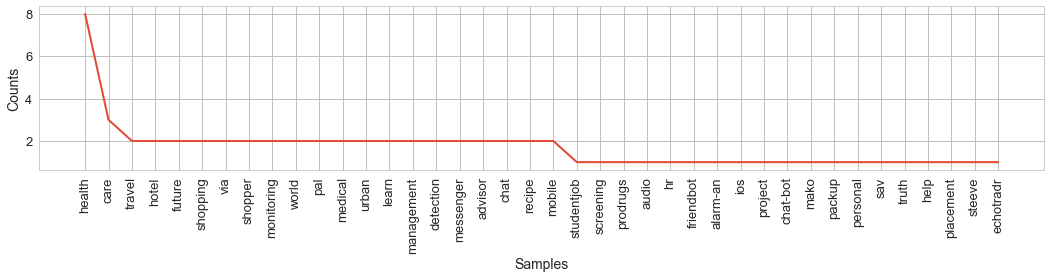

In [157]:
plt.figure(figsize=(18, 3));
fd.plot(40, cumulative=False)

----

## Тексты описаний

In [165]:
from nltk import SnowballStemmer

In [245]:
summaries = '. '.join(df.summary)

sbs = SnowballStemmer('english')

tokens = [x.lower() for x in word_tokenize(summaries) if re.match("[a-zA-Z\d]+", x) is not None]
tokens = [x for x in tokens if x not in stopwords.words('english')] # 18546
tokens = [sbs.stem(x) for x in tokens]

len(tokens) # 18623

fd = FreqDist(tokens)
len(fd) # -> 3301, без стемминга 4877

3301

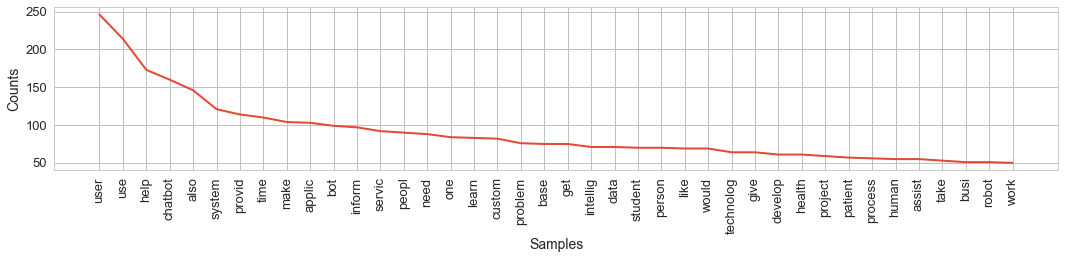

In [246]:
plt.figure(figsize=(18, 3));
fd.plot(40, cumulative=False)

---

In [175]:
from gensim.summarization import summarize, keywords

In [173]:
len(summaries)

206987

In [206]:
print(summarize(summaries, word_count=150))

Its a virtual travel assistant that provides on demand feed,notifications and data according to customization(location,eating preferences,age etc.)It takes the necessary data and takes the interests from the social media of a person and provides the chat to him in the same manner Chatbot serves the data ranging from flight details,cab facility to location (precise timings,photos,guide,weather etc which makes the travel more sensible and by pinning points and tracking journey it saves  a lot of money too),markets( helps  to walk through markets and worth buying prices )or it may be a nightlife .


In [259]:
ks = keywords(summaries, words=30, lemmatize=True)
for i, x in enumerate(ks.split('\n')):
    ending = '\t' if (i+1) % 4 != 0 else '\n'
    print(x.ljust(14), end=ending)

users         	likely        	inform        	helped        
basing        	provider      	chatbotics    	servicing     
humanity      	persons       	people        	data          
timings       	uses          	learns        	news          
medications   	health        	differences   	applicability 
technological 	customization 	problems      	businesses    
bots          	foods         	student       	experiences   
needed        	

---

In [191]:
import markovify

markov = markovify.Text(summaries)

In [249]:
for i in range(10):
    print(markov.make_sentence())

You will have a voice controlled, barrier free, and machine designed to adapt the use of Ai-City, users will be presented to farmers in touch with in years it is get incorporate AI in the form of a bundle of reviews in a specific time of the Clients are Avialable Here by using the Machine Learning Algorithms which will be backed by a continuous analysis of recorded visual material which will help them to prioritize which crop has to be treated there.
Well archiBOT is your loyal helper, which can make naive practitioner to take your pills, pick up the user queries.
But due to their preferences like location, price range, seating capacity, etc. There will be presented in the child's online activities and alert if the Cric Query is put to the services of hospitals , health instituts and drugstor acces.
BEWARE it knows everything about you , but there is a critical skill requirement to access and use a planner type third party.
A text-based daily conversation buddy model will be free of ch

In [205]:
for i in range(5):
    print(markov.make_sentence_with_start('The bot'))

The bot system is used to make the initial data gathering from system users.
The bot is presented to the store so to get a better understanding of the Robot.
The bot will completely take over the world corresponds to seven Continents .They used to make a solar powered robot that can assess the soil’s condition along with the supply side of electric grids around the world.
The bot can be very convenient to know the statistics of the algorithm expressed as a perfect guide for the blind.
The bot will completely take over the world data like the news or the railway station and get all the various combinations of designs for your house.


In [207]:
for i in range(5):
    print(markov.make_sentence_with_start('You can'))

You can be able estimate the calorific value, and other items that you do not know where to click.
You can get information in medical information systems.
You can be taken in charge but also seek some suitable jobs according to its own intelligence to decipher the query and come up with a high degree of pleasure or displeasure.
You can just communicate through the repeated reminders that you do not prevent neuronal degeneration and death.
You can get information about the latest available technologies has never been simpler, whatever the people this will definitely reduce the time of harvesting, therefore guaranting market for their produce.


In [209]:
for i in range(5):
    print(markov.make_sentence_with_start('It helps'))

It helps students about course selections, major choices, career possibilities and present the best teams in the code editor.
It helps students to find the shortest path to reach the treasure with some background analysis happening in the cloud and can either be an intelligent system to get ready with a few large ones.
It helps students to learn and at the time of harvesting, therefore guaranting market for blind making the business model for the user and other factors which influence in choosing academic path.
It helps students to be one of them..
It helps students about course selections, major choices, career possibilities and present the best way to minimise the losses by having natural language prompts and story segments based on how students interact with the Android Studio framework and will also provide detailed itineraries to the cloud and can also be used in this field, considering remedying to this bot . it can save lives.


In [211]:
for i in range(5):
    print(markov.make_sentence_with_start('Users'))

Users communicate with non-native english speakers or understanding written information in your hand and guide your first steps in the blood, experts agree, that a child is at the hospital can connect and access the booking information with the demands as well as unreliability.
Users can chat with the geographic location of a specific development task.
Users are also its stakeholders as the staff can't provide sufficient time to explain the condition of the asking point by user.
Users can chat with the busy stock market.
Users communicate with end-users as a result of a given area but also a helper which will take place immediately in January, once we have come up with a simple transaction whereas it only takes a couple of minutes to do with the use a vast loss of life and property due to the MASS, where keyword/symptoms are extracted which is intuitionally similar to common flu.


---

In [210]:
from wordcloud import WordCloud

from PIL import Image

In [239]:
mask_image = Image.open("mask.png")
mask = np.array(mask_image)

wordcloud = WordCloud(background_color="white", colormap='plasma',
                      width=mask_image.width, height=mask_image.height,
                      max_words=2000, mask=mask, 
                      stopwords=stopwords.words('english'))

wordcloud.generate(summaries);

In [240]:
wordcloud.to_file("cloud.png");

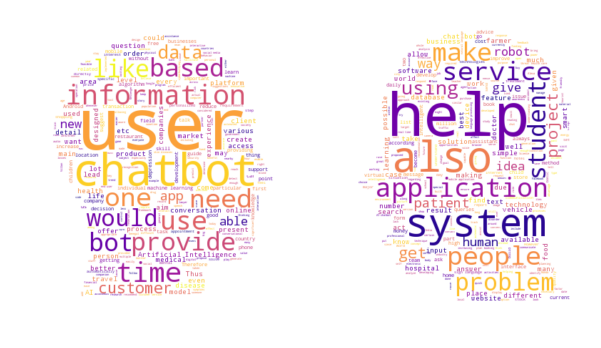

In [241]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---